In [1]:
import sys
sys.path.append("../")

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

2023-04-29 15:03:20.463092: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
dicom_dataset = pd.read_csv("../dataset/csv/dicom_info.csv")
mass_train= pd.read_csv("../dataset/csv/mass_case_description_train_set.csv")
mass_test = pd.read_csv("../dataset/csv/mass_case_description_test_set.csv")

In [4]:
image_paths = mass_train["image file path"].values
patient_ids = []

for image_path in image_paths:
    path = os.path.normpath(image_path)
    patient_ids.append(path.split(os.sep)[0])
    
mass_train["PatientID"] = patient_ids

In [5]:
image_paths = mass_test["image file path"].values
patient_ids = []

for image_path in image_paths:
    path = os.path.normpath(image_path)
    patient_ids.append(path.split(os.sep)[0])

mass_test["PatientID"] = patient_ids

In [6]:
mass_train = mass_train.merge(dicom_dataset[["PatientID", "image_path"]], on='PatientID', how='inner')
mass_test = mass_test.merge(dicom_dataset[["PatientID", "image_path"]], on='PatientID', how='inner')

In [7]:
image_paths = mass_train["image_path"].values
image_cropped_paths = []

for image_path in image_paths:
    path = os.path.normpath(image_path)
    x = path.split(os.sep)
    x[0] = "../dataset"
    image_cropped_paths.append(os.path.join(*x))
    
mass_train["fixed_image_paths"] = image_cropped_paths

In [8]:
image_paths = mass_test["image_path"].values
image_cropped_paths = []

for image_path in image_paths:
    path = os.path.normpath(image_path)
    x = path.split(os.sep)
    x[0] = "../dataset"
    image_cropped_paths.append(os.path.join(*x))
    
mass_test["fixed_image_paths"] = image_cropped_paths

In [10]:
mass_train["ROI mask file path"]

'Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n'

In [14]:
calc_train = pd.read_csv("../dataset/csv/calc_case_description_train_set.csv")

In [23]:
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,PatientID,image_path,fixed_image_paths
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.342386...,../dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.34238...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.359308...,../dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.35930...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.891800...,../dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.89180...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.295360...,../dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.29536...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.410524...,../dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.41052...


In [24]:
mass_train["image file path"][0]

'Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.dcm'

In [28]:
dicom_dataset["image_path"][0]

'CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg'

In [20]:
calc_train["image file path"][0]

'Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/000000.dcm'

In [17]:
calc_train

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,Calc-Training_P_02566_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,Calc-Training_P_02584_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...


2023-04-24 15:16:03.729442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [329]
	 [[{{node Placeholder/_0}}]]
2023-04-24 15:16:03.730321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [329]
	 [[{{node Placeholder/_0}}]]


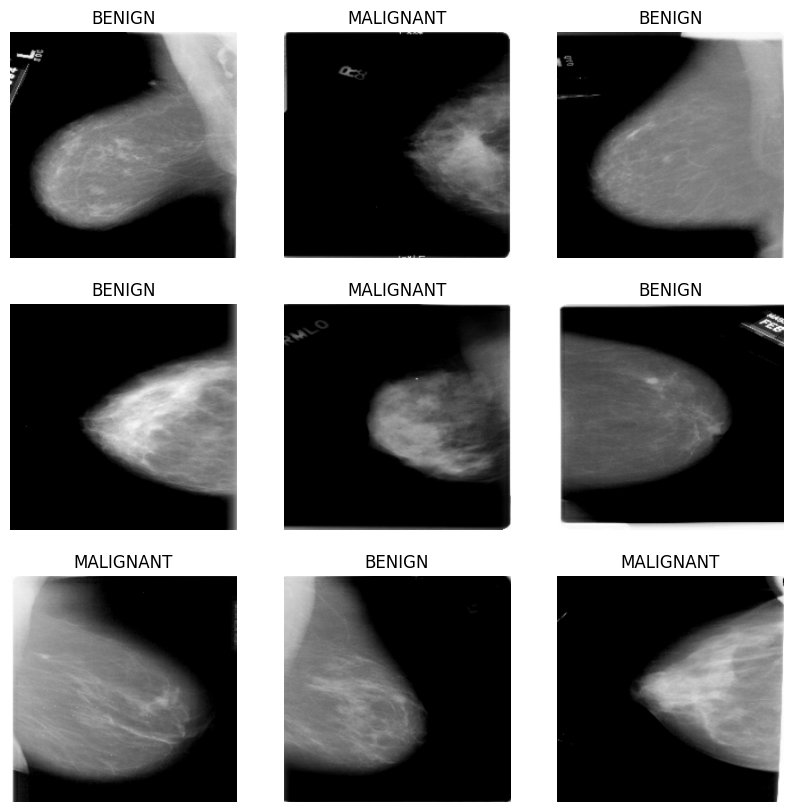

In [28]:
class_names = tf_validation_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in .take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [29]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [31]:
preprocess_input =  tf.keras.applications.inception_v3.preprocess_input

In [40]:
IMG_SHAPE = (256, 256) + (3,)

base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [41]:
image_batch, label_batch = next(iter(tf_train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 2048)


In [42]:
base_model.trainable = False

In [44]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [71]:
feature_batch_average

<tf.Tensor: shape=(32, 2048), dtype=float32, numpy=
array([[0.12835999, 0.        , 0.06368116, ..., 2.3794298 , 5.769247  ,
        0.2602638 ],
       [0.72662187, 3.2010052 , 0.69161385, ..., 0.21997759, 0.08295123,
        0.07036314],
       [4.4796033 , 6.1092057 , 1.5793319 , ..., 0.6817089 , 0.        ,
        2.4660978 ],
       ...,
       [0.        , 0.40271676, 1.9549391 , ..., 7.6051908 , 3.7584832 ,
        7.75183   ],
       [0.17750722, 0.5121817 , 0.04126361, ..., 0.        , 0.        ,
        1.541295  ],
       [0.05059758, 0.        , 1.7366071 , ..., 0.        , 0.        ,
        1.3849673 ]], dtype=float32)>

In [74]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [79]:
inputs = tf.keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [84]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
loss0, accuracy0 = model.evaluate(tf_validation_dataset)

2023-04-24 15:46:34.786363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 6s 346ms/step - loss: 0.6737 - accuracy: 0.5562


In [86]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0*100))

initial loss: 0.67
initial accuracy: 55.62


In [87]:
history = model.fit(tf_train_dataset,
                    epochs=20,
                    validation_data=tf_validation_dataset)

Epoch 1/20


2023-04-24 15:46:42.258387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 20s 415ms/step - loss: 0.8477 - accuracy: 0.5362 - val_loss: 0.8687 - val_accuracy: 0.5350
Epoch 2/20
37/37 [==============================] - 14s 364ms/step - loss: 0.8105 - accuracy: 0.5736 - val_loss: 0.8016 - val_accuracy: 0.5380
Epoch 3/20
37/37 [==============================] - 13s 360ms/step - loss: 0.7213 - accuracy: 0.5830 - val_loss: 0.7196 - val_accuracy: 0.5714
Epoch 4/20
37/37 [==============================] - 13s 362ms/step - loss: 0.8085 - accuracy: 0.5677 - val_loss: 0.7684 - val_accuracy: 0.5927
Epoch 5/20
37/37 [==============================] - 14s 376ms/step - loss: 0.7219 - accuracy: 0.6136 - val_loss: 0.7787 - val_accuracy: 0.5836
Epoch 6/20
37/37 [==============================] - 14s 379ms/step - loss: 0.6962 - accuracy: 0.5991 - val_loss: 0.7638 - val_accuracy: 0.6049
Epoch 7/20
37/37 [==============================] - 14s 373ms/step - loss: 0.8418 - accuracy: 0.5957 - val_loss: 0.6934 - val_accuracy: 0.6109
Epoch 8/20

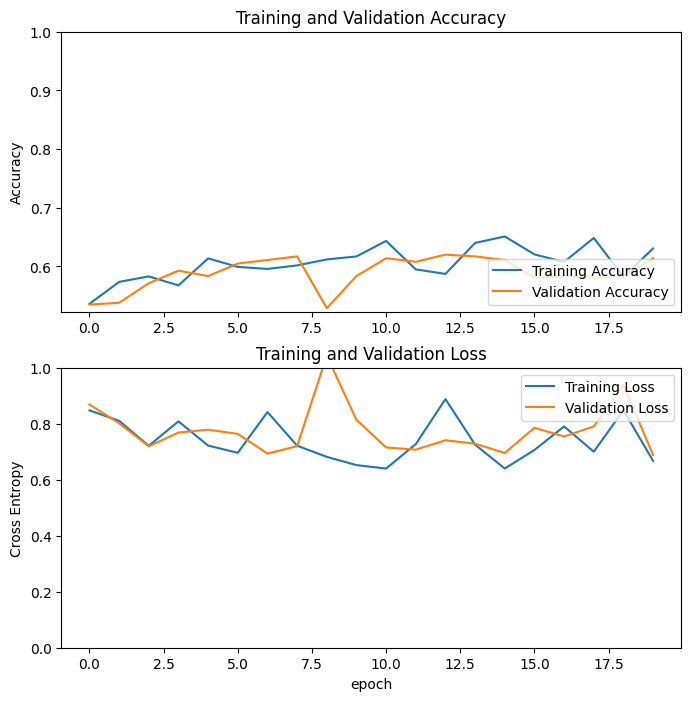

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

2023-04-24 15:52:14.637300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [32,256,256,3]
	 [[{{node Placeholder/_0}}]]
2023-04-24 15:52:15.296706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Predictions:
 [0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1]
Labels:
 [1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0]


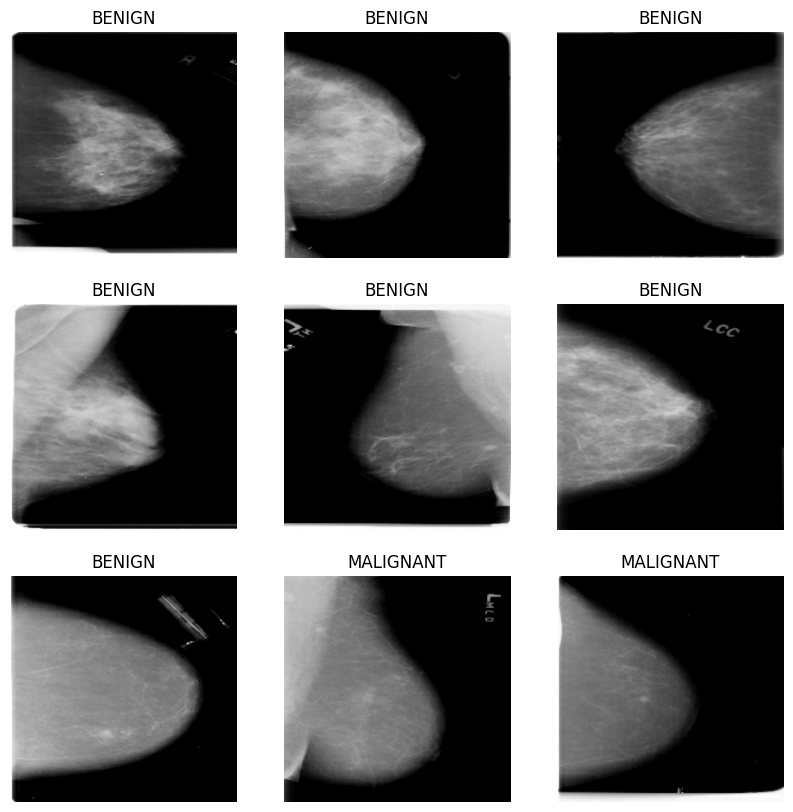

In [90]:
image_batch, label_batch = tf_validation_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [92]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 tf.math.truediv_9 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_9 (TFOpLam  (None, 256, 256, 3)      0         
 bda)                                                            
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0   